In [3]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
# Anova test - one way Anova Example

# Mean Scores of 3 Archers
# Anova helps in testing if the mean scores of all archers are the same or not
# Null Hypothesis: Means are equal across all groups
# Alternate Hypothesis: Atleast one of the means are significantly different

data = np.rec.array([
('Pat', 5),
('Pat', 4),
('Pat', 4),
('Pat', 3),
('Pat', 9),
('Pat', 4),
('Jack', 4),
('Jack', 8),
('Jack', 7),
('Jack', 5),
('Jack', 1),
('Jack', 5),
('Alex', 9),
('Alex', 8),
('Alex', 8),
('Alex', 10),
('Alex', 5),
('Alex', 10)], dtype = [('Archer','|U5'),('Score', '<i8')])

In [6]:
# Performing shapiro and levenes test to confirm assumptions of Normality & Equal Variances

# Shapiro Test
# Null Hypothesis - Data is normally distributed
# Alternate Hypothesis - Data is not normally distributed

shapiro(data[data['Archer'] == 'Jack'].Score)

# P-value>0.05 hence data is normal
# (However, ANOVA is robust to violation of normality rule, provided variances are equal)
# Repeat above shapiro test for other 2 archers as well

(0.9515655040740967, 0.7529401779174805)

In [8]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

levene(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)

# p-value > 0.05 hence all variances are equal

LeveneResult(statistic=0.14957264957264957, pvalue=0.86234425352007804)

In [9]:
f, p = f_oneway(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

# Since p-value<0.05 , we say that atleast one of the means is significantly different

One-way ANOVA
F value: 5.0
P value: 0.0216837493201 



In [10]:
mc = MultiComparison(data['Score'], data['Archer'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 Alex   Jack  -3.3333  -6.5755 -0.0911  True 
 Alex   Pat     -3.5   -6.7422 -0.2578  True 
 Jack   Pat   -0.1667  -3.4089  3.0755 False 
---------------------------------------------
['Alex' 'Jack' 'Pat']


In [11]:
# Let us import some data for our next analysis (2 way ANOVA). 
# This time some data on tooth growth:

data2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')

In [12]:
data2

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


In [26]:
data2.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [13]:
data2['supp'].describe()

count     60
unique     2
top       OJ
freq      30
Name: supp, dtype: object

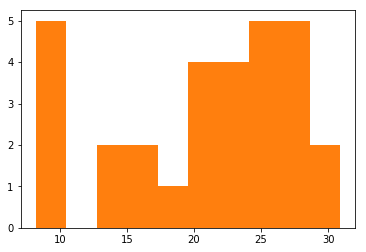

In [15]:
plt.hist(data2[data2['supp'] == 'OJ'].len)
plt.show()

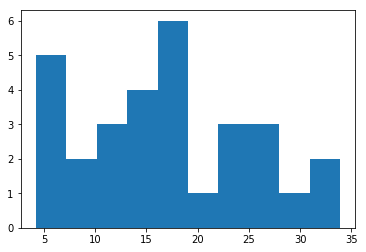

In [16]:
plt.hist(data2[data2['supp'] == 'VC'].len)
plt.show()

In [17]:
# From histogram we can conclude that data is not normal

# Perform levene's test for supp and len separately

levene(data2[data2['supp'] == 'OJ'].len,data2[data2['supp'] == 'VC'].len)

# pvalue>0.05 , hence variances are equal

LeveneResult(statistic=1.2135720656945064, pvalue=0.27517646161440529)

In [33]:
levene(data2[data2['dose'] == 0.5].len,data2[data2['dose'] == 1.0].len,data2[data2['dose'] == 2.0].len)

#pvalue>0.05 hence variances are equal

LeveneResult(statistic=0.64573411096315059, pvalue=0.52806945737599054)

In [18]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data2).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [ ]:
# We can see that p < 0.05 for interaction effect, we can reject it.
# H0 for interaction : There is an interaction effect 


# other 'p' values are also < 0.05 , reject NULL Hypothesis. The categories in SUPP and 